## <center>Exploratory Data Analysis (EDA)</center>

In [1]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
import matplotlib.pyplot as plt
from pprint import pprint
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nrclex import NRCLex

# Download NLTK resources (if not already downloaded)
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('stopwords')

## Load data from csv

In [2]:
movie_df = pd.read_csv('data/movie.csv')
rating_df = pd.read_csv('data/rating.csv')
user_df = pd.read_csv('data/user.csv')

print(movie_df.shape)
print(rating_df.shape)
print(user_df.shape)

(5000, 14)
(10468, 10)
(1203, 4)


## Overall statistics of Rating, Movie, User data frames

In [3]:
movie_df.describe(include='all')

,movieid,movie_title,movie_year,movie_release_date,movie_genre,movie_rating,movie_href,movie_desc,movie_cast,movie_tag,budget,revenue,page_count,download_flag
count,5000,5000,5000.000000,5000,4997,5000.000000,5000,5000,5000,4936,5.000000e+03,5.000000e+03,5000.000000,5000.0
unique,5000,4882,NaN,3560,1304,NaN,5000,4999,4994,4913,NaN,NaN,NaN,NaN
top,1022789-inside-out-2,Robin Hood,NaN,2012-02-23,Comedy|,NaN,/movie/1022789-inside-out-2,We don\'t have an overview translated in Engli...,Josephine Langford|Hero Fiennes Tiffin|Louise ...,duringcreditsstinger|,NaN,NaN,NaN,NaN
freq,1,3,NaN,7,249,NaN,1,2,2,6,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.093000,NaN,NaN,65.202800,NaN,NaN,NaN,NaN,4.085610e+07,1.302420e+08,125.500000,1.0
std,NaN,NaN,14.347959,NaN,NaN,7.955472,NaN,NaN,NaN,NaN,4.750874e+07,2.037971e+08,72.175424,0.0
min,NaN,NaN,1925.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,1.368000e+07,1.000000,1.0
25%,NaN,NaN,1994.000000,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,1.000000e+07,2.799499e+07,63.000000,1.0
50%,NaN,NaN,2005.000000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,2.500000e+07,5.755203e+07,125.500000,1.0
75%,NaN,NaN,2013.000000,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,5.162500e+07,1.428370e+08,188.000000,1.0


In [4]:
rating_df.describe(include='all')

,reviewid,userid,movieid,movie_title,rating,review_date,review_text,user_href,review_href,download_flag
count,10468,10468,10468,10468,10468.000000,10468,10462,10468,10468,10468.000000
unique,10468,1210,3565,3475,NaN,2999,10376,1210,10468,NaN
top,4fb026f6760ee33b55006268,Geronimo1967,414906-the-batman,Halloween,NaN,2023-01-12,.,/u/Geronimo1967,/review/4fb026f6760ee33b55006268,NaN
freq,1,1249,14,21,NaN,124,5,1249,1,NaN
mean,NaN,NaN,NaN,NaN,43.553687,NaN,NaN,NaN,NaN,0.997707
std,NaN,NaN,NaN,NaN,36.173965,NaN,NaN,NaN,NaN,0.047830
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,1.000000


In [5]:
user_df.describe(include='all')

,userid,user_name,user_href,user_join_date
count,1203,1203,1203,1203
unique,1203,1090,1203,163
top,007ace,This account has been deleted,/u/007ace,1900-01-01
freq,1,48,1,111


## Data cleaning

In [6]:
# Check the number of missing values ​​in each column for Rating data
missing_values = rating_df.isnull().sum()
print(missing_values)

reviewid         0
userid           0
movieid          0
movie_title      0
rating           0
review_date      0
review_text      6
user_href        0
review_href      0
download_flag    0
dtype: int64


In [7]:
# Check for duplicated rows in the DataFrame
duplicates = rating_df[rating_df.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")

Number of duplicated rows: 0


In [8]:
# Remove rows which rating = 0 or 'no rating'
rating_df_cleaned = rating_df[rating_df['rating'] != 0]

# Delete rows with missing values
rating_df_cleaned = rating_df_cleaned.dropna()

# Delete rows with missing values
rating_df_cleaned = rating_df_cleaned.drop(columns='movie_title') # drop this column to avoid duplicate column when merging with movie_df

print(rating_df_cleaned.shape)

(6770, 9)


In [9]:
# Check the number of missing values ​​in each column for Movie data
missing_values = movie_df.isnull().sum()
print(missing_values)

movieid                0
movie_title            0
movie_year             0
movie_release_date     0
movie_genre            3
movie_rating           0
movie_href             0
movie_desc             0
movie_cast             0
movie_tag             64
budget                 0
revenue                0
page_count             0
download_flag          0
dtype: int64


In [10]:
# Delete rows with missing values
movie_df_cleaned = movie_df.dropna()

In [11]:
# Use the 'movieid' column to merge the two data sets and only retain matching data
merged_data = pd.merge(
    rating_df_cleaned,
    movie_df_cleaned[['movieid', 'movie_title', 'movie_year', 'movie_genre']],
    on='movieid',
    how='inner'  # Use inner join to keep only matching data
)
merged_data.head(2)

,reviewid,userid,movieid,rating,review_date,review_text,user_href,review_href,download_flag,movie_title,movie_year,movie_genre
0,4fb026f6760ee33b55006268,darrenhamilton14,62213-dark-shadows,85,2012-05-13,Let\'s leave it all at the door here. I loved ...,/u/darrenhamilton14,/review/4fb026f6760ee33b55006268,1,Dark Shadows,2012,Comedy|Fantasy|
1,5a92f36fc3a36824fd0238c6,Dark+Jedi,62213-dark-shadows,70,2018-02-25,I generally like Tim Burton as well as Johnny...,/u/Dark+Jedi,/review/5a92f36fc3a36824fd0238c6,1,Dark Shadows,2012,Comedy|Fantasy|


In [12]:
# Save the merged data into a CSV file
merged_data.to_csv("data/merged_movie_ratings.csv", index=False)

In [13]:
# Load merged data
data_df = merged_data

# View Basic Information
print(data_df.info())
print(data_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6758 entries, 0 to 6757
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewid       6758 non-null   object
 1   userid         6758 non-null   object
 2   movieid        6758 non-null   object
 3   rating         6758 non-null   int64 
 4   review_date    6758 non-null   object
 5   review_text    6758 non-null   object
 6   user_href      6758 non-null   object
 7   review_href    6758 non-null   object
 8   download_flag  6758 non-null   int64 
 9   movie_title    6758 non-null   object
 10  movie_year     6758 non-null   int64 
 11  movie_genre    6758 non-null   object
dtypes: int64(3), object(9)
memory usage: 686.4+ KB
None
            rating  download_flag   movie_year
count  6758.000000    6758.000000  6758.000000
mean     67.354247       0.996745  2008.467298
std      20.550886       0.056967    13.455567
min       5.000000       0.000000  1925.000000

In [14]:
# Checking data types and missing values
missing_values = data_df.isnull().sum()
data_types = data_df.dtypes

# Convert 'review_date' to date format
data_df['review_date'] = pd.to_datetime(data_df['review_date'], errors='coerce')

print("Missing value ：\n", missing_values)
print("\nData Type：\n", data_types)

Missing value ：
 reviewid         0
userid           0
movieid          0
rating           0
review_date      0
review_text      0
user_href        0
review_href      0
download_flag    0
movie_title      0
movie_year       0
movie_genre      0
dtype: int64

Data Type：
 reviewid         object
userid           object
movieid          object
rating            int64
review_date      object
review_text      object
user_href        object
review_href      object
download_flag     int64
movie_title      object
movie_year        int64
movie_genre      object
dtype: object


In [15]:
# Check which columns contain data of type list or object
# for col in data_df.columns:
#    print(f"{col}: {data_df[col].apply(type).value_counts()}")
    
# Exclude columns containing list type data to avoid TypeError
subset = [col for col in data_df.columns if not data_df[col].apply(lambda x: isinstance(x, list)).any()]

# Check for duplicate rows (exclude columns containing list )
duplicate_rows = data_df[data_df.duplicated(subset=subset)]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [16]:
# Check if there are duplicate rows
duplicate_rows = data_df[data_df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [17]:
# Basic statistical information on ratings
rating_stats = data_df['rating'].describe()

# Print scoring statistics
print("Rating Statistics：\n", rating_stats)

Rating Statistics：
 count    6758.000000
mean       67.354247
std        20.550886
min         5.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       100.000000
Name: rating, dtype: float64


## EDA 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
n_ratings = len(data_df)
n_movies = data_df['movieid'].nunique()
n_users = data_df['userid'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movie id: {n_movies}")
print(f"Number of unique users: {n_users}")

print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

print(f"Mean global rating: {round(data_df['rating'].mean(),2)}.")

mean_ratings = data_df.groupby('userid')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Number of ratings: 6758
Number of unique movie id: 2006
Number of unique users: 982
Average number of ratings per user: 6.88
Average number of ratings per movie: 3.37
Mean global rating: 67.35.
Mean rating per user: 70.4.


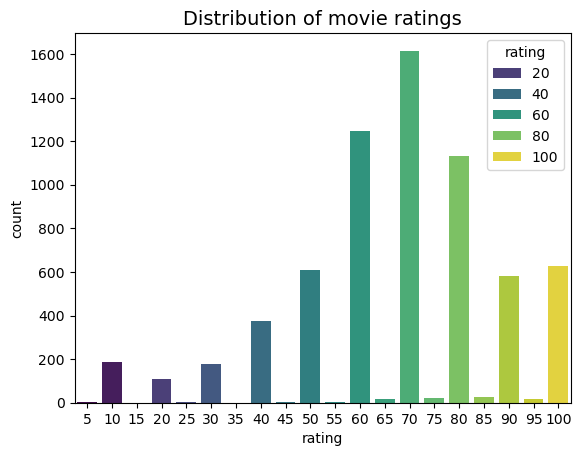

In [20]:
sns.countplot(x="rating", data=data_df, palette="viridis", hue="rating", legend=True)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [21]:
# Top 5 movies are most frequently rated
data_df['movie_title'].value_counts()[0:5]

The Mummy            14
Ghostbusters         14
Scream               11
Godzilla             11
The Suicide Squad    10
Name: movie_title, dtype: int64

In [22]:
# What are the highest and lowest rated movies?
mean_ratings = data_df.groupby('movieid')[['rating']].mean()

highest_rated = mean_ratings['rating'].idxmax()
highest_rated_movie =  data_df[data_df['movieid'] == highest_rated]['movie_title'].iloc[0]
rating =  data_df[data_df['movieid'] == highest_rated]['rating'].iloc[0]
print(f"Highest rated movie: { highest_rated_movie}, rating: {rating}")

lowest_rated = mean_ratings['rating'].idxmin()
lowest_rated_movie = data_df[data_df['movieid']==lowest_rated]['movie_title'].iloc[0]
rating =  data_df[data_df['movieid'] == lowest_rated]['rating'].iloc[0]
print(f"Lowest rated movie: { lowest_rated_movie}, rating: {rating}")

Highest rated movie: The Last Airbender, rating: 100
Lowest rated movie: Blues Brothers 2000, rating: 10


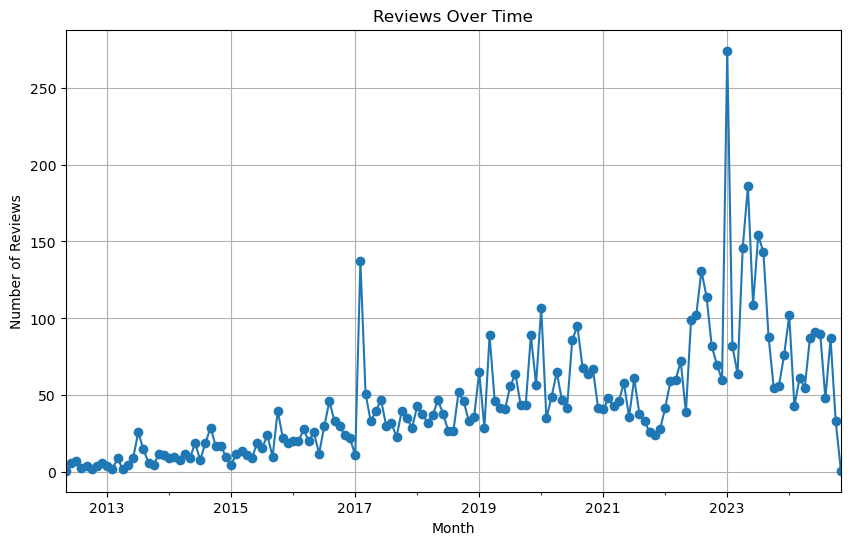

In [23]:
# Number of comments summarized by month
reviews_over_time = data_df.groupby(data_df['review_date'].dt.to_period('M')).size()

# Mapping of trends in the number of comments by month
plt.figure(figsize=(10, 6))
reviews_over_time.plot(kind='line', marker='o', title='Reviews Over Time', xlabel='Month', ylabel='Number of Reviews')
plt.grid(True)
plt.show()

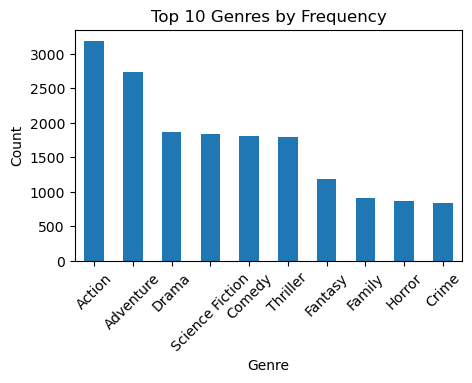

In [24]:
# Splitting movie genres (Genres) into separate elements
data_df['genres_split'] = data_df['movie_genre'].str.strip('|').str.split('|')

genres_exploded = data_df.explode('genres_split')

genre_counts = genres_exploded['genres_split'].value_counts().head(10)

plt.figure(figsize=(5, 3))
genre_counts.plot(kind='bar', title='Top 10 Genres by Frequency', xlabel='Genre', ylabel='Count')
plt.xticks(rotation=45)
plt.show()

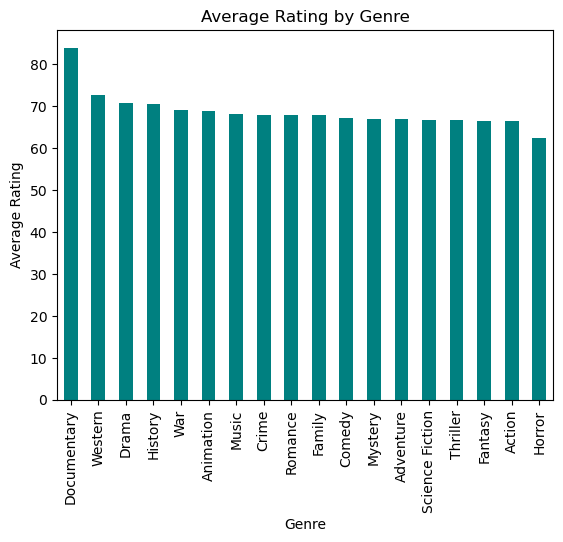

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Split genres and replace empty strings with NaN
genres_split = data_df.assign(genre=data_df['movie_genre'].str.split('|')).explode('genre')
genres_split['genre'] = genres_split['genre'].replace('', pd.NA)  
genres_split = genres_split.dropna(subset=['genre'])

# Compute and visualize the average ratings by genre
genres_avg_rating = genres_split.groupby('genre')['rating'].mean()

# Plotting the average ratings
genres_avg_rating.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

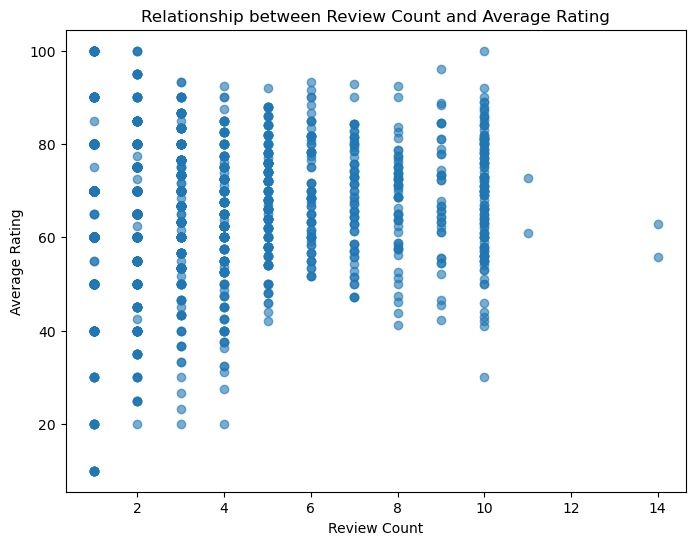

In [26]:
# Average rating by number of reviews
reviews_rating = data_df.groupby('movie_title').agg(review_count=('reviewid', 'count'), avg_rating=('rating', 'mean'))

plt.figure(figsize=(8, 6))
plt.scatter(reviews_rating['review_count'], reviews_rating['avg_rating'], alpha=0.6)
plt.title('Relationship between Review Count and Average Rating')
plt.xlabel('Review Count')
plt.ylabel('Average Rating')
plt.show()